<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Check for GPU
!nvidia-smi

Tue Apr  8 15:41:06 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P0             27W /   70W |     124MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

2.6.0+cu124


## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [ ]:
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

train_dataset = datasets.MNIST(root="data", train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.MNIST(root="data", train=False, download=True, transform=transforms.ToTensor())

In [ ]:
train_dataset, test_dataset

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
img = train_dataset[0][0]
label = train_dataset[0][1]
# print(f"Image:\n {img}")
# print(f"Label: {label}")
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

## 6. Visualize at least 5 different samples of the MNIST training dataset.

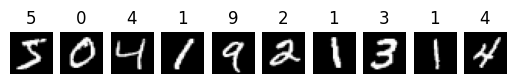

In [ ]:
# show five images in a horizantal list
import matplotlib.pyplot as plt
for i in range(10):
  img, label = train_dataset[i]
  plt.subplot(1, 10, i+1)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(label)
  plt.axis("off")
plt.show()


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x78aff91e5550>,
 <torch.utils.data.dataloader.DataLoader at 0x78aff9152790>)

In [ ]:
for sample in next(iter(train_loader)):
  print(sample.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [ ]:
len(train_loader), len(test_loader)

(1875, 313)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [ ]:
from torch import nn
class CNN_model(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f'Output shape of block 1: {x.shape}')
    x = self.conv_block_2(x)
    #print(f'Output shape of block 2: {x.shape}')
    x = self.classifier(x)
    #print(f'Output shape of classifier: {x.shape}')
    return x

In [ ]:
device

'cuda'

In [ ]:
model = CNN_model(input_shape=1,
                  hidden_units=10,
                  output_shape=10).to(device)
model

CNN_model(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# Try a dummy forward pass to see what shapes our data is
dummy_x = torch.rand(size=(1,28,28)).unsqueeze(dim=0).to(device)
dummy_x.shape
model(dummy_x)

tensor([[ 0.0009,  0.0608,  0.0168,  0.0336,  0.0144,  0.0610,  0.0349, -0.0287,
          0.0756, -0.0302]], device='cuda:0', grad_fn=<AddmmBackward0>)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [ ]:
device

'cuda'

In [ ]:
%%time
from tqdm.auto import tqdm
# train model on cpu
model_cpu = CNN_model(input_shape=1,
                  hidden_units=10,
                  output_shape=10).to('cpu')

# create a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_cpu.parameters(), lr=0.1)

### Training loop
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss = 0
  for batch, (X, y) in enumerate(train_loader):
    model_cpu.train()

    # put the data on cpu
    X, y = X.to('cpu'), y.to('cpu')

    # forward pass
    y_pred = model_cpu(X)

    # calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    # Adjust train loss for number of batches
    train_loss /= len(train_loader)

    ### testing
    test_loss_total = 0

    # put model in eval
    model_cpu.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(test_loader):
      X_test, y_test = X_test.to('cpu'), y_test.to('cpu')
      test_pred = model_cpu(X_test)
      test_loss = loss_fn(test_pred, y_test)
      test_loss_total += test_loss
    test_loss_total /= len(test_loader)

  #print what's happening
  print(f"Epoch: {epoch} | Train loss: {train_loss:.5f} | Test loss: {test_loss_total:.5f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.00000 | Test loss: 0.08628
Epoch: 1 | Train loss: 0.00012 | Test loss: 0.06131
Epoch: 2 | Train loss: 0.00001 | Test loss: 0.05678
Epoch: 3 | Train loss: 0.00001 | Test loss: 0.06297
Epoch: 4 | Train loss: 0.00004 | Test loss: 0.05415
CPU times: user 2min 58s, sys: 1.36 s, total: 2min 59s
Wall time: 2min 59s


In [ ]:
%%time
from tqdm.auto import tqdm
# train model on cpu
model_cpu = CNN_model(input_shape=1,
                  hidden_units=10,
                  output_shape=10).to(device)

# create a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_cpu.parameters(), lr=0.1)

### Training loop
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss = 0
  for batch, (X, y) in enumerate(train_loader):
    model_cpu.train()

    # put the data on cpu
    X, y = X.to(device), y.to(device)

    # forward pass
    y_pred = model_cpu(X)

    # calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    # Adjust train loss for number of batches
    train_loss /= len(train_loader)

    ### testing
    test_loss_total = 0

    # put model in eval
    model_cpu.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(test_loader):
      X_test, y_test = X_test.to(device), y_test.to(device)
      test_pred = model_cpu(X_test)
      test_loss = loss_fn(test_pred, y_test)
      test_loss_total += test_loss
    test_loss_total /= len(test_loader)

  #print what's happening
  print(f"Epoch: {epoch} | Train loss: {train_loss:.5f} | Test loss: {test_loss_total:.5f}")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.00004 | Test loss: 0.07657
Epoch: 1 | Train loss: 0.00000 | Test loss: 0.05107
Epoch: 2 | Train loss: 0.00001 | Test loss: 0.04175
Epoch: 3 | Train loss: 0.00000 | Test loss: 0.05168
Epoch: 4 | Train loss: 0.00000 | Test loss: 0.04325
CPU times: user 54.3 s, sys: 459 ms, total: 54.7 s
Wall time: 55.1 s


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [ ]:
# logits -> prediction probilities -> pred labels
logits = model_cpu(test_dataset[0][0].unsqueeze(dim=0).to(device))
pred_prob = torch.softmax(logits, dim=1)
pred_label = torch.argmax(pred_prob, dim=1)
print(f"Prediction label: {pred_label}")
print(f"Actual label: {test_dataset[0][1]}")

Prediction label: tensor([7], device='cuda:0')
Actual label: 7


## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?